In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Fase 1

x0 = 60 cm

x1=80 cm

x2=140 cm

masa_deslizador = 202.5 g, 
resolución = 0.1g

longitud_aleta = 0.0614m, resolución 0.00005m

In [2]:
x_0 = 0.6 #m
x_1 = 0.8 #m
x_2 = 1.4 #m
deslizador = 0.2025 #kg
g = 9.7803 #m/s^2

## Importe de datos, cálculo de promedios y desviaciones

In [42]:
fase1 = pd.read_csv("../data/Fase_1.csv", delimiter=";", decimal=",",
                    usecols=(3, 5, 6, 8, 12, 14, 15, 17, 21, 23, 24, 26, 30, 32, 33, 35, 39, 41, 42, 44),
                    names=("1.v1", "1.v2", "1.t", "1.a", "2.v1", "2.v2", "2.t", "2.a", "3.v1", "3.v2",
                           "3.t", "3.a", "4.v1", "4.v2", "4.t", "4.a", "5.v1", "5.v2", "5.t", "5.a",),
                    skiprows=2).dropna(how="all")

for i in range(1,6):
    fase1[str(i)+".v2"] = fase1[str(i)+".v2"].shift(periods=-3)
    fase1[str(i)+".t"] = fase1[str(i)+".t"].shift(periods=-2)
    fase1[str(i)+".a"] = fase1[str(i)+".a"].shift(periods=-1)
fase1 = fase1.dropna().set_index(pd.Index(range(0,10)))
masa_portamasa = np.array([0.025, 0.050, 0.075, 0.100, 0.125])+0.005
fuerzas = (masa_portamasa*deslizador*g)/(masa_portamasa+deslizador)
fase1

,1.v1,1.v2,1.t,1.a,2.v1,2.v2,2.t,2.a,3.v1,3.v2,3.t,3.a,4.v1,4.v2,4.t,4.a,5.v1,5.v2,5.t,5.a
0,0.7568,1.4200,0.5649,1.2583,0.9770,1.8395,0.4379,2.1117,1.1149,2.1064,0.3813,2.7903,1.2394,2.3273,0.3451,3.3792,1.3077,2.4848,0.3227,3.9183
1,0.7562,1.4223,0.5656,1.2624,0.9785,1.8206,0.4369,2.0644,1.1141,2.1030,0.3824,2.7737,1.2389,2.3310,0.3453,3.3910,1.3095,2.4927,0.3229,3.9351
2,0.7553,1.4223,0.5659,1.2637,0.9798,1.8351,0.4370,2.0974,1.1185,2.1012,0.3811,2.7651,1.2404,2.3260,0.3451,3.3721,1.3114,2.4871,0.3223,3.9167
3,0.7561,1.4236,0.5658,1.2649,0.9746,1.8282,0.4386,2.0860,1.1216,2.1153,0.3789,2.8133,1.2485,2.3271,0.3443,3.3544,1.3120,2.4887,0.3224,3.9190
4,0.7556,1.4241,0.5658,1.2671,0.9727,1.8250,0.4401,2.0760,1.1259,2.1129,0.3786,2.7945,1.2453,2.3245,0.3449,3.3520,1.3105,2.4894,0.3222,3.9291
5,0.7549,1.4244,0.5663,1.2679,0.9690,1.8213,0.4405,2.0741,1.1229,2.1119,0.3790,2.7990,1.2415,2.3238,0.3452,3.3595,1.3152,2.4833,0.3224,3.8887
6,0.7539,1.4223,0.5666,1.2651,0.9692,1.8273,0.4403,2.0901,1.1232,2.1247,0.3788,2.8371,1.2435,2.3308,0.3454,3.3727,1.3064,2.4777,0.3235,3.8873
7,0.7545,1.4251,0.5666,1.2691,0.9693,1.8278,0.4401,2.0917,1.1275,2.1114,0.3785,2.7865,1.2426,2.3331,0.3451,3.3869,1.3122,2.4736,0.3233,3.8540
8,0.7565,1.4299,0.5668,1.2738,0.9699,1.8346,0.4407,2.1047,1.1254,2.1275,0.3796,2.8316,1.2388,2.3309,0.3459,3.3843,1.3064,2.4904,0.3232,3.9353
9,0.7538,1.4267,0.5675,1.2720,0.9709,1.8247,0.4401,2.0796,1.1174,2.1105,0.3801,2.8035,1.2411,2.3247,0.3449,3.3672,1.3071,2.4869,0.3228,3.9255


In [47]:
fase1_prom = pd.DataFrame(np.round(fase1.mean(), 4)).T
fase1_std = pd.DataFrame(np.round(fase1.std(ddof=1), 4)).T
fase1_CV = np.round(fase1_std*100/fase1_prom, 4)
fase1_CV

,1.v1,1.v2,1.t,1.a,2.v1,2.v2,2.t,2.a,3.v1,3.v2,3.t,3.a,4.v1,4.v2,4.t,4.a,5.v1,5.v2,5.t,5.a
0,0.1456,0.1966,0.1236,0.3632,0.4213,0.3391,0.3415,0.6994,0.4192,0.3976,0.3423,0.8216,0.2496,0.1418,0.1159,0.4033,0.2214,0.2374,0.1549,0.6699


## Cálculo de la aceleración y graficación

In [59]:
fase1_a = pd.DataFrame()
for i in range(1, 6):
    fase1_a[str(i)+".a"] = round((fase1_prom[str(i)+".v2"] - fase1_prom[str(i)+".v1"])/fase1_prom[str(i)+".t"], 4)
# (1 - (fase1_a/fase1_prom[["1.a", "2.a", "3.a", "4.a", "5.a"]]))*100
fase1_a

fase1_aErr = pd.DataFrame()
for i in range(1, 6):
    fase1_aErr[str(i)+".a"] = round((fase1_std[str(i)+".v2"] / fase1_prom[str(i)+".t"]) + (fase1_std[str(i)+".v1"] / fase1_prom[str(i)+".t"]) + (((fase1_prom[str(i)+".v2"]-fase1_prom[str(i)+".v1"])*fase1_std[str(i)+".t"])/fase1_prom[str(i)+".t"]**2),4)
fase1_aErr.T

,0
1.a,0.0083
2.a,0.0301
3.a,0.0434
4.a,0.0222
5.a,0.0329


4.7358 -0.0424


95.9

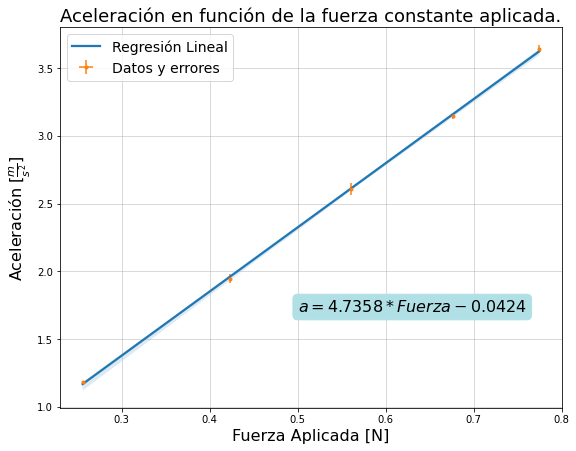

In [34]:
# plt.plot(masa_portamasa*g, fase1_a.values[0], ".-")
# sns.regplot(x=np.append(fuerzas, 0), y=np.append(fase1_a.values[0], 0))
# slope, intercept = np.polyfit(np.append(fuerzas,0), np.append(fase1_a.values[0],0), 1)
plt.figure(figsize=(9,7))
sns.regplot(x=fuerzas, y=fase1_a.values[0], scatter=False,label="Regresión Lineal")
plt.errorbar(fuerzas, fase1_a.values[0], yerr=fase1_aErr.values[0], xerr=((((deslizador**2*masa_portamasa**2)*g)/(deslizador+masa_portamasa)**2)*0.001), fmt=".", label="Datos y errores")
slope, intercept = np.round(np.polyfit(fuerzas, fase1_a.values[0], 1),4)
print(slope, intercept)
# plt.plot(np.linspace(fuerzas.min(), fuerzas.max(), 5) ,slope*fuerzas+intercept)
plt.title("Aceleración en función de la fuerza constante aplicada.", size=18)
plt.xlabel("Fuerza Aplicada [N]", size=16)
plt.ylabel(r"Aceleración [$\frac{m}{s^2}$]", size=16)
plt.grid(alpha=.6)
plt.legend(fontsize=14)
plt.text(0.5, 1.7,r"$a = 4.7358*Fuerza - 0.0424$", size=16, bbox={"boxstyle" : "round", "color":"powderblue"})
round(slope*100/(1/deslizador), 4)
# plt.plot(fuerzas, fuerzas*slope)
# plt.plot(fase1_a.values[0], fase1_prom[["1.a", "2.a", "3.a", "4.a", "5.a"]].values[0])

In [33]:
np.abs(intercept)-fase1_aErr

,1.a,2.a,3.a,4.a,5.a
0,0.0341,0.0123,-0.001,0.0202,0.0095


# Fase 2

## Importe de datos, cálculo de promedios y desviaciones

In [56]:
fase2 = pd.read_csv("../data/Fase_2.csv", delimiter=";", decimal=",",
                    usecols=(3, 5, 6, 8, 12, 14, 15, 17, 21, 23, 24, 26, 30, 32, 33, 35, 39, 41, 42, 44),
                    names=("1.v1", "1.v2", "1.t", "1.a", "2.v1", "2.v2", "2.t", "2.a", "3.v1", "3.v2",
                           "3.t", "3.a", "4.v1", "4.v2", "4.t", "4.a", "5.v1", "5.v2", "5.t", "5.a",),
                    skiprows=2).dropna(how="all")
for i in range(1,6):
    fase2[str(i)+".v2"] = fase2[str(i)+".v2"].shift(periods=-3)
    fase2[str(i)+".t"] = fase2[str(i)+".t"].shift(periods=-2)
    fase2[str(i)+".a"] = fase2[str(i)+".a"].shift(periods=-1)
fase2 = fase2.dropna().set_index(pd.Index(range(0,10)))
masa_deslizador = deslizador + np.array([0.050, 0.100, 0.150, 0.200, 0.250])
fase2
masa_deslizador

array([0.2525, 0.3025, 0.3525, 0.4025, 0.4525])

In [55]:
fase2_prom = pd.DataFrame(np.round(fase2.mean(), 4)).T
fase2_std = pd.DataFrame(np.round(fase2.std(ddof=1), 4)).T
fase2_CV = np.round(fase2_std*100/fase2_prom, 4)
fase2_prom

,1.v1,1.v2,1.t,1.a,2.v1,2.v2,2.t,2.a,3.v1,3.v2,3.t,3.a,4.v1,4.v2,4.t,4.a,5.v1,5.v2,5.t,5.a
0,0.8865,1.6821,0.4806,1.7762,0.8256,1.5627,0.5166,1.531,0.7721,1.4607,0.5524,1.3372,0.73,1.3774,0.5847,1.1874,0.7003,1.314,0.6094,1.0796


## Cálculo de la aceleración y graficación

In [62]:
fase2_a = pd.DataFrame()
for i in range(1, 6):
    fase2_a[str(i)+".a"] = round((fase2_prom[str(i)+".v2"] - fase2_prom[str(i)+".v1"])/fase2_prom[str(i)+".t"], 4)
# (1 - (fase1_a/fase1_prom[["1.a", "2.a", "3.a", "4.a", "5.a"]]))*100
fase2_a

fase2_aErr = pd.DataFrame()
for i in range(1, 6):
    fase2_aErr[str(i)+".a"] = round((fase2_std[str(i)+".v2"]/fase2_prom[str(i)+".t"])+(fase2_std[str(i)+".v1"]/fase2_prom[str(i)+".t"])+(((fase2_prom[str(i)+".v2"]-fase2_prom[str(i)+".v1"])*fase2_std[str(i)+".t"])/fase2_prom[str(i)+".t"]**2),4)
fase2_aErr.T

,0
1.a,0.0250
2.a,0.0144
3.a,0.0073
4.a,0.0088
5.a,0.0118


array([0.32584053, 0.27913254, 0.24241681, 0.22113097, 0.19812555])

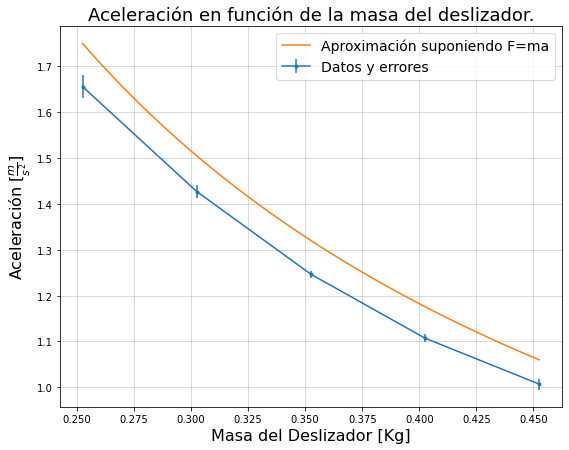

In [78]:
plt.figure(figsize=(9,7))
plt.errorbar(masa_deslizador, fase2_a.values[0], yerr=fase2_aErr.values[0], fmt=".-", label="Datos y errores")
# sns.regplot(x=np.append(fuerzas, 0), y=np.append(fase1_a.values[0], 0))
# slope, intercept = np.polyfit(np.append(fuerzas,0), np.append(fase1_a.values[0],0), 1)
# sns.regplot(x=masa_deslizador, y=fase2_a.values[0])
# things = np.polyfit(masa_deslizador, fase2_a.values[0], 1)
# print(things)
# plt.plot(np.linspace(masa_deslizador.min(), masa_deslizador.max(), 5) ,(things[0]*masa_deslizador**2)+(things[1]*masa_deslizador)+things[2])
# slope/(1/deslizador)
# plt.plot(masa_deslizador, ((0.05*g)/(masa_deslizador+0.05)), ".-")
plt.plot(np.linspace(masa_deslizador.min(), masa_deslizador.max(), 100), ((0.055*g)/(np.linspace(masa_deslizador.min(), masa_deslizador.max(), 100)+0.055)), "-", label="Aproximación suponiendo F=ma")
# plt.errorbar(masa_deslizador, ((0.055*g)/(masa_deslizador+0.055)), fmt=".", yerr=((0.055*g)/(masa_deslizador+0.055)**2)*0.001, label="Errir")
plt.title("Aceleración en función de la masa del deslizador.", size=18)
plt.xlabel("Masa del Deslizador [Kg]", size=16)
plt.ylabel(r"Aceleración [$\frac{m}{s^2}$]", size=16)
plt.grid(alpha=.6)
plt.legend(fontsize=14)
# (np.abs(1-fase2_a.values[0]/((0.055*g)/(masa_deslizador+0.055)))*100)
np.abs((fase2_a.values[0]-((0.055*g)/(masa_deslizador+0.055))))
e = ((0.055*g)/(masa_deslizador+0.055)**2)*0.001
np.round(e,4)*100/(((0.055*g)/(masa_deslizador+0.055)))